In [47]:
import json
from pulsekit.graph import Graph
from bezierv.classes.bezierv import Bezierv
from bezierv.algorithms.proj_grad import ProjGrad
import matplotlib.pyplot as plt
from datetime import datetime, time
import numpy as np
import random
from statsmodels.distributions.empirical_distribution import ECDF


In [24]:
with open('data\Chicago_main.json', 'r') as f:
    data = json.load(f)

In [30]:
subkeys = ['start_node', 'end_node', 'start_longitude', 'start_latitude', 'end_longitude', 'end_latitude', 'length_miles']
start_time = time(16, 0)  # 16:00
end_time = time(19, 0)    # 19:00
data_organized = {}
for key, value in data.items():
    start = value['start_node']
    end = value['end_node']
    key = (start, end)
    if key not in data_organized:
        data_organized[key] = {}
    for sub_key, sub_value in value.items():
        if sub_key not in subkeys:
            dt = datetime.strptime(sub_key, "%Y-%m-%d %H:%M:%S")
            if start_time <= dt.time() <= end_time and dt.weekday() < 5:
                if 'travel_time' not in data_organized[key]:
                    data_organized[key]['travel_time'] = []
                else:
                    data_organized[key]['travel_time'].append(sub_value)
        else:
            data_organized[key][sub_key] = sub_value

In [35]:
def get_sample(values, sample_size):
  if not values:
    return []
  population_size = len(values)
  if sample_size > population_size:
    raise ValueError("Sample size cannot be larger than the population size for sampling without replacement.")
  sample = random.sample(values, k=sample_size)
  return sample

In [38]:
n = 7
k = 200
counter = 0
for key, value in data_organized.items():
    uniques = len(set(value['travel_time']))
    if uniques > 1:
        x_sample = get_sample(value['travel_time'], min(200, len(value['travel_time'])))
        controls_z0 = np.linspace(0, 1, n + 1)
        bezierv_proj = Bezierv(n)
        proj_grad = ProjGrad(bezierv_proj, x_sample)
        bezierv_proj_fitted = proj_grad.fit(controls_z0, step=0.001)
        data_organized[key]['bezierv'] = bezierv_proj_fitted
    counter += 1
    if counter % 100 == 0:
        print(f"Processed {counter} keys out of {len(data_organized)}")


Processed 100 keys out of 1297
Converged in 214 iterations
Converged in 979 iterations
Converged in 417 iterations
Converged in 572 iterations
Converged in 844 iterations
Converged in 684 iterations
Converged in 194 iterations
Processed 200 keys out of 1297
Converged in 697 iterations
Converged in 878 iterations
Converged in 363 iterations
Converged in 441 iterations
Converged in 245 iterations
Converged in 571 iterations
Converged in 410 iterations
Converged in 771 iterations
Converged in 711 iterations
Converged in 817 iterations
Converged in 777 iterations
Converged in 241 iterations
Converged in 272 iterations
Converged in 651 iterations
Converged in 223 iterations
Converged in 709 iterations
Converged in 485 iterations
Converged in 250 iterations
Converged in 176 iterations
Converged in 641 iterations
Converged in 296 iterations
Converged in 338 iterations
Converged in 222 iterations
Converged in 560 iterations
Converged in 701 iterations
Converged in 739 iterations
Converged in 9

C:\Users\esteb\OneDrive - Universidad de los andes\Documentos\ANDES\Primer Semestre - MIND\Research\bezierv\bezierv\classes\bezierv.py:487: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


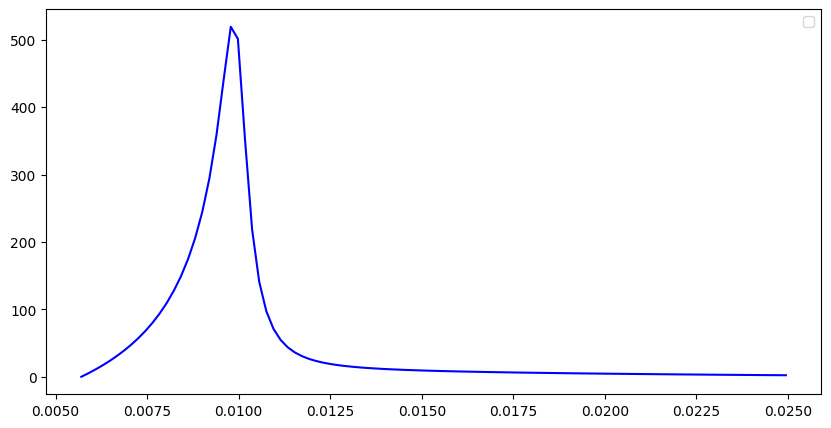

In [ ]:
uniques = []
keys = []
for key, value in data_organized.items():
    u = len(set(value['travel_time']))
    uniques.append(u)
    if u > 1:
        keys.append(key)

plt.figure(figsize=(10, 5))
data_organized[keys[0]]['bezierv'].plot_cdf()
data_organized[keys[0]]['bezierv'].plot_pdf()

(0.005, 0.025)

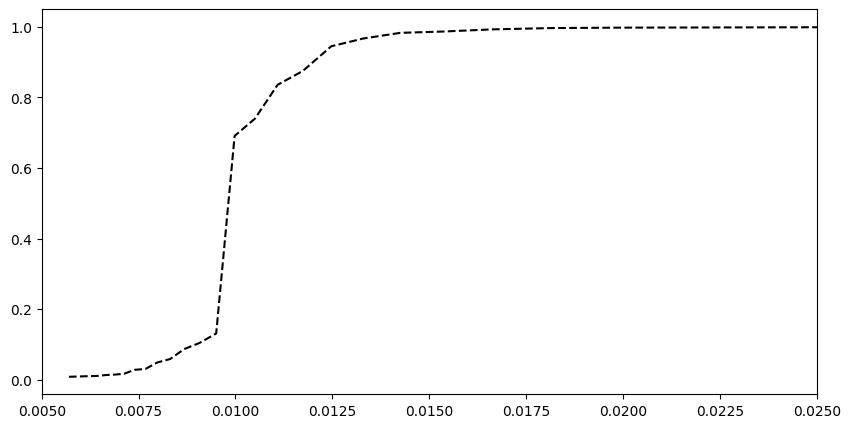

In [61]:
plt.figure(figsize=(10, 5))
ecdf_fn = ECDF(data_organized[keys[0]]['travel_time'])
plt.plot(sorted(data_organized[keys[0]]['travel_time']), ecdf_fn(data_organized[keys[0]]['travel_time']), label='Empirical CDF', linestyle='--', color='black')
plt.xlim(0.005, 0.0250)

In [65]:
graph = Graph()
for key, value in data_organized.items():
    start_node_name = value['start_node']
    end_node_name = value['end_node']
    deterministic = {
        'start_longitude': value['start_longitude'],
        'start_latitude': value['start_latitude'],
        'end_longitude': value['end_longitude'],
        'end_latitude': value['end_latitude'],
        'length_miles': value['length_miles']
    }
    random = {
        'travel_time': 0
    }
    graph.add_link(start_node_name, end_node_name, deterministic=deterministic, random=random)

TypeError: Node.__init__() missing 1 required positional argument: 'links'